I should have done more transformations of data since i had a hard time understanding the initial dataset. I should have focus on in finding one insight instead of worrying of how 
the different columns relate to each other.

In [1]:
# SEATWORK 10.1 RT-Iot2022 Analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('RT_IOT2022.csv')

## EXTRACTION PHASE

In [2]:
df.head() # check initial values

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


## TRANSFORMATION PHASE

In [3]:
df2 = df.copy() # creating a copy for safety

In [4]:
df2.info() # checking of attributes and information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [5]:
df2.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [12]:
df2['service'].unique() # there are rows with no service

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [13]:
df2.query('service == "-"') # what does this mean

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
511,511,36685,1883,tcp,-,0.000000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,0,502,MQTT_Publish
512,512,36685,1883,tcp,-,0.000000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,0,502,MQTT_Publish
513,513,36685,1883,tcp,-,0.000000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,0,502,MQTT_Publish
514,514,36685,1883,tcp,-,0.000000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,0,502,MQTT_Publish
515,515,36685,1883,tcp,-,0.000000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,0,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,2005,59247,63331,tcp,-,0.000006,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,2006,59247,64623,tcp,-,0.000007,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,2007,59247,64680,tcp,-,0.000006,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,2008,59247,65000,tcp,-,0.000006,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [27]:
df2.shape

(123117, 85)

In [18]:
df2.loc[df2.service == '-'].describe()

,no,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,102861.000000,102861.000000,102861.000000,102861.000000,102861.000000,102861.000000,102861.000000,102861.000000,1.028610e+05,1.028610e+05,...,1.028610e+05,1.028610e+05,1.028610e+05,1.028610e+05,1.028610e+05,1.028610e+05,1.028610e+05,102861.000000,102861.000000,102861.000000
mean,43649.726796,32325.035601,1002.998435,1.081663,1.251728,1.014942,1.174624,0.136048,4.209116e+05,4.209035e+05,...,1.439954e+04,8.586359e+03,4.572465e+04,5.271309e+04,9.478331e+05,4.879038e+04,2.696230e+03,852.190548,40.991902,805.993700
std,29042.616145,19580.066801,5702.150883,111.275547,20.935417,8.121149,20.836791,8.109191,3.681153e+05,3.681198e+05,...,1.657894e+06,1.590504e+06,2.443422e+06,2.544959e+06,1.021138e+08,2.471767e+06,1.562337e+05,6902.775240,1583.417393,6688.921114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17513.000000,14248.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,1.997288e+05,1.997288e+05,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,43228.000000,33327.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,3.814697e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,68943.000000,50060.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,8.388608e+05,8.388608e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,1755.000000,4345.000000,1755.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,2.286229e+07,65535.000000,65535.000000,65535.000000


In [20]:
df2['Attack_type'].unique()

array(['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb', 'ARP_poisioning',
       'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH',
       'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN'], dtype=object)

In [21]:
df2[df2['Attack_type'] == 'DOS_SYN_Hping']

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
20791,0,2840,21,tcp,-,0.000041,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20792,1,2841,21,tcp,-,0.000006,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20793,2,2842,21,tcp,-,0.000005,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20794,3,2843,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20795,4,2844,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115445,94654,34865,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115446,94655,42729,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115447,94656,44682,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115448,94657,41378,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [19]:
df2['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

## LOADING PHASE

In [10]:
# finding the instances of each attack type

df2['Attack_type'].value_counts(normalize = True) # focus on TOP 3

Attack_type
DOS_SYN_Hping                 0.768854
Thing_Speak                   0.065856
ARP_poisioning                0.062948
MQTT_Publish                  0.033675
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008139
DDOS_Slowloris                0.004337
Wipro_bulb                    0.002055
Metasploit_Brute_Force_SSH    0.000301
NMAP_FIN_SCAN                 0.000227
Name: proportion, dtype: float64

Insight on most COMMON attack Type: There is no serivce recorded or behavior of this attack is denying service

In [37]:
df2[(df2['Attack_type'] == 'DOS_SYN_Hping') & (df2['service'] == '-')] # checking of data 

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
20791,0,2840,21,tcp,-,0.000041,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20792,1,2841,21,tcp,-,0.000006,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20793,2,2842,21,tcp,-,0.000005,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20794,3,2843,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
20795,4,2844,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115445,94654,34865,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115446,94655,42729,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115447,94656,44682,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
115448,94657,41378,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [38]:
df2[(df2['Attack_type'] == 'DOS_SYN_Hping') & (df2['service'] != '-')] # checking of data 

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type


Checking of summary statistics for most common attack type:
Shows that the maximum value for most of the columns are 0
and other columns have a very low value like flow duration column
but the active average is 45.06.

In [39]:
df2[(df2['Attack_type'] == 'DOS_SYN_Hping') & (df2['service'] == '-')].describe()

,no,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,94659.000000,94659.000000,94659.0,94659.000000,94659.0,94659.000000,94659.0,94659.0,9.465900e+04,9.465900e+04,...,94659.000000,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0
mean,47329.000000,30748.834892,21.0,0.000003,1.0,0.897633,1.0,0.0,4.447962e+05,4.447962e+05,...,2.727020,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
std,27325.843903,19411.496837,0.0,0.000002,0.0,0.303133,0.0,0.0,3.689500e+05,3.689500e+05,...,1.942489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,21.0,0.000000,1.0,0.000000,1.0,0.0,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
25%,23664.500000,12808.500000,21.0,0.000001,1.0,1.000000,1.0,0.0,1.997288e+05,1.997288e+05,...,0.953674,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
50%,47329.000000,30201.000000,21.0,0.000003,1.0,1.000000,1.0,0.0,2.467238e+05,2.467238e+05,...,3.099442,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
75%,70993.500000,47621.500000,21.0,0.000004,1.0,1.000000,1.0,0.0,8.388608e+05,8.388608e+05,...,4.053116,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
max,94658.000000,65535.000000,21.0,0.000045,1.0,1.000000,1.0,0.0,1.048576e+06,1.048576e+06,...,45.061111,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0


In [36]:
attack_name = list(df2['Attack_type'].unique())
 # finding other attack types with no service
for i in attack_name:
    check = df2[(df2['Attack_type'] == i) & (df2['service'] == '-')].shape[0]
    if check > 0:
        print (i)

MQTT_Publish
Thing_Speak
Wipro_bulb
ARP_poisioning
DDOS_Slowloris
DOS_SYN_Hping
NMAP_FIN_SCAN
NMAP_OS_DETECTION
NMAP_TCP_scan
NMAP_UDP_SCAN
NMAP_XMAS_TREE_SCAN


Now we would get the protocol and service of the 3 most common attack types

In [47]:
atk = df['Attack_type'].value_counts().nlargest(3)
atk

Attack_type
DOS_SYN_Hping     94659
Thing_Speak        8108
ARP_poisioning     7750
Name: count, dtype: int64

Now in this output we can observe that only DOS_SYN_HPING does not have a captured service.
Then the two next common attack type has observable serivces and protocol and their most common
service is DNS and protocol is UDP

In [49]:
checking = list(atk.index)

for name in checking:
    print(name)
    print(df[df['Attack_type'] == name][['service', 'proto']].value_counts())

DOS_SYN_Hping
service  proto
-        tcp      94659
Name: count, dtype: int64
Thing_Speak
service  proto
dns      udp      4068
http     tcp      2667
ssl      tcp      1097
ntp      udp       110
-        udp        92
         icmp       45
         tcp        14
dhcp     udp        14
dns      tcp         1
Name: count, dtype: int64
ARP_poisioning
service  proto
dns      udp      5458
ssl      tcp      1459
-        udp       324
         tcp       214
http     tcp       129
dns      tcp       125
dhcp     udp        26
-        icmp        8
ntp      udp         7
Name: count, dtype: int64


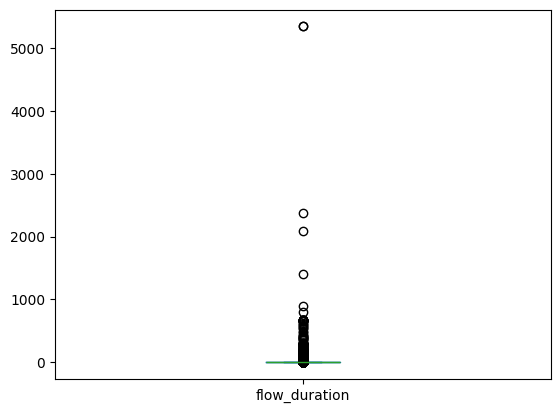

In [56]:
arp = df[df['Attack_type'] == 'ARP_poisioning']['flow_duration']

arp.plot(kind = "box")
plt.show()

In [46]:
attackers = df2.groupby('Attack_type')['flow_duration'].describe() # checking of statistics

attackers

,count,mean,std,min,25%,50%,75%,max
Attack_type,,,,,,,,
ARP_poisioning,7750.0,15.893538,108.261070,0.000000,0.000000,0.000637,0.307533,5341.392332
DDOS_Slowloris,534.0,14.699148,14.124797,0.000000,0.003817,20.088963,30.557698,30.870463
DOS_SYN_Hping,94659.0,0.000003,0.000002,0.000000,0.000001,0.000003,0.000004,0.000045
MQTT_Publish,4146.0,43.397013,24.341563,0.000000,30.022991,44.067645,61.973033,353.112391
Metasploit_Brute_Force_SSH,37.0,3.006557,5.210286,0.000000,1.417588,2.030317,2.258765,29.289262
NMAP_FIN_SCAN,28.0,0.023614,0.108791,0.000000,0.000000,0.000000,0.000000,0.575884
NMAP_OS_DETECTION,2000.0,0.000008,0.000007,0.000001,0.000005,0.000006,0.000007,0.000048
NMAP_TCP_scan,1002.0,0.000019,0.000269,0.000001,0.000002,0.000004,0.000005,0.005989
NMAP_UDP_SCAN,2590.0,0.737766,24.909755,0.000000,0.000000,0.000000,0.000000,905.964201


In [ ]:
# test the columns to each other for corr then find the attack type with corr